In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import MissingIndicator 
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from scipy import special

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

from statsmodels.tsa.seasonal import seasonal_decompose

from datetime import datetime, date
from pmdarima import auto_arima

import statistics
import statsmodels.graphics.tsaplots as sgt

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



plt.rcParams["figure.figsize"] = (10,8)
 

In [2]:
data = pd.read_csv('/home/camilocorredor/Documents/Data_Science_Projects/Euro_Dolar/Data/Data_USD_2.csv', sep = ',')

data['Date'] = data['Date'].apply(lambda x: pd.Timestamp(x))
data.set_index('Date', inplace = True)
data = data.drop(columns=['Unnamed: 0'])
data.head(500)

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
Date,,,,,,,,,,,,,,,,,,
2021-06-12,1.1281,1.1304,1.1311,1.1267,-0.20,48909.1,6865.78,15380.79,35304.13,4137.11,23349.38,8439.7,15817.47,4591.67,3590.01,7232.28,69.33,Bajo
2021-05-12,1.1305,1.1321,1.1321,1.1301,-0.08,49405.5,6865.78,15380.79,35304.13,4137.11,23349.38,8439.7,15817.47,4591.67,3590.01,7232.28,67.95,Bajo
2021-03-12,1.1313,1.1301,1.1334,1.1265,0.12,53631.5,6765.52,15169.98,34579.55,4080.15,23766.69,8241.7,15712.04,4538.43,3607.43,7122.32,66.74,Subio
2021-02-12,1.1299,1.1320,1.1349,1.1294,-0.18,56496.0,6795.75,15263.11,34641.70,4108.02,23788.93,8300.8,15990.76,4577.10,3573.84,7129.21,67.84,Bajo
2021-01-12,1.1319,1.1339,1.1360,1.1302,-0.15,57210.3,6881.87,15472.67,34021.61,4179.15,23658.92,8452.6,15877.72,4513.04,3576.89,7168.68,66.77,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-14,1.1127,1.1135,1.1145,1.1104,-0.05,8829.2,6040.89,13456.49,28939.67,3774.88,28885.14,9528.3,9033.42,3283.15,3106.82,7622.35,58.09,Bajo
2020-01-13,1.1133,1.1125,1.1148,1.1112,0.12,8111.4,6036.14,13451.52,28907.05,3779.68,28954.94,9543.9,9070.65,3288.13,3115.57,7617.60,58.12,Subio
2020-10-01,1.1120,1.1106,1.1130,1.1085,0.14,8187.1,6037.11,13483.31,28823.77,3789.52,28638.20,9573.6,8966.64,3265.35,3092.29,7587.85,59.17,Subio


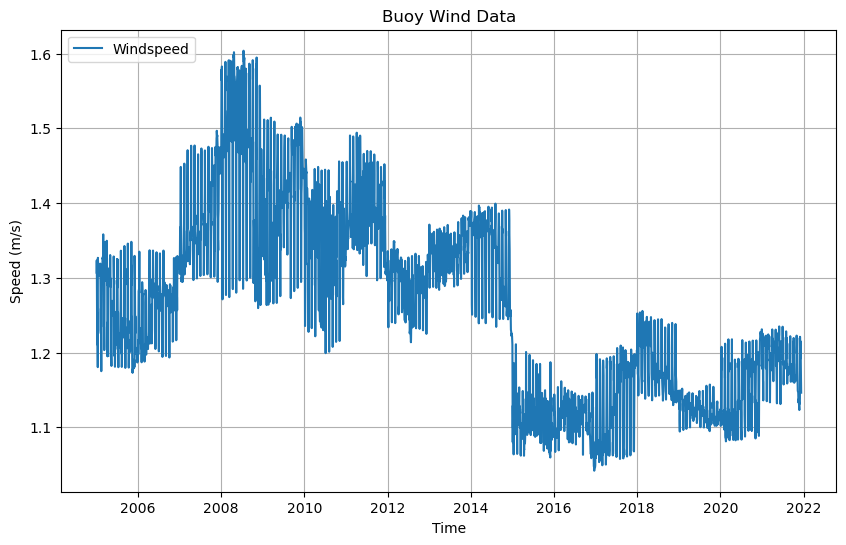

In [19]:
# fig, ax = plt.subplots(figsize=(10, 6))

# # Specify how our lines should look
# ax.plot(data.index, data.Máximo, label='Windspeed')

# # Same as above
# ax.set_xlabel('Time')
# ax.set_ylabel('Speed (m/s)')
# ax.set_title('Buoy Wind Data')
# ax.grid(True)
# ax.legend(loc='upper left')
# plt.show()

In [20]:
data2 = data.sort_index() ### Importante

In [24]:
data2 = data2.asfreq('b', method = 'bfill')
data2

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
Date,,,,,,,,,,,,,,,,,,
2005-01-03,1.3186,1.3226,1.3234,1.3167,-0.39,0.1,4054.98,4383.62,10830.00,2324.48,14061.15,9472.3,1527.25,1273.46,1303.41,5000.50,51.46,Bajo
2005-01-04,1.2908,1.2960,1.3060,1.2869,-0.42,0.1,4080.08,4373.53,10404.30,2324.48,13491.35,9289.5,1469.35,1273.46,1223.57,4914.00,56.53,Bajo
2005-01-05,1.2908,1.2960,1.3060,1.2869,-0.42,0.1,4080.08,4373.53,10404.30,2324.48,13491.35,9289.5,1469.35,1273.46,1223.57,4914.00,56.53,Bajo
2005-01-06,1.2188,1.2306,1.2343,1.2160,-0.99,0.1,4178.25,4527.17,10549.87,2324.48,13873.07,9550.8,1559.50,1273.46,1039.19,5011.00,52.37,Bajo
2005-01-07,1.1959,1.2100,1.2109,1.1942,-1.18,0.1,4269.62,4617.07,10303.44,2324.48,14177.87,9829.1,1490.53,1273.46,1055.59,5161.00,56.73,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-06,1.2069,1.2148,1.2153,1.2065,-0.63,49384.2,6279.35,15150.22,33587.66,3947.43,28231.04,9007.7,13001.63,4063.04,3462.75,7004.63,65.69,Bajo
2021-12-07,1.1859,1.1872,1.1881,1.1836,-0.12,33113.0,6559.25,15790.51,34996.18,4093.38,27515.24,8816.7,14877.89,4384.63,3547.84,7125.42,74.33,Bajo
2021-12-08,1.1727,1.1738,1.1749,1.1724,-0.09,44403.4,6882.47,15937.51,35499.85,4226.33,26517.82,8979.4,15088.98,4460.84,3524.74,7193.23,68.91,Bajo


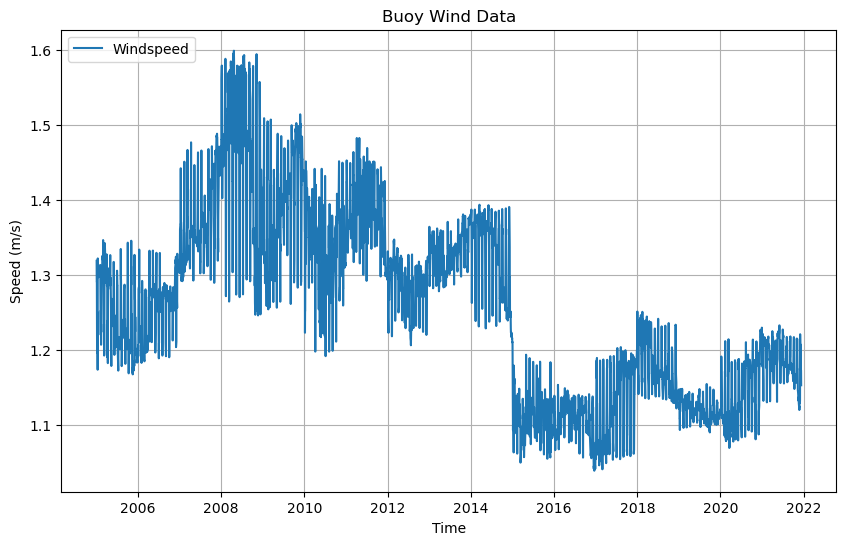

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(data2.index, data2.Cierre, label='Windspeed')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('Speed (m/s)')
ax.set_title('Buoy Wind Data')
ax.grid(True)
ax.legend(loc='upper left')
plt.show()

In [87]:
data2 = data.asfreq('b')
data.head()
#data2.index
# data.index

,Date,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
1970-01-01,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [177]:
# # d3 = np.asarray(data3)
# print(data3['Máximo'][3])
# print(len(d3))
# for idx in range(0, len(data3)):
#     if idx > 0:
#         vl = data3['Máximo'][idx - 1]
#         if pd.isna(data3['Máximo'][idx]):
#             data3['Máximo'][idx] = vl

# data3.head()

1.3168
4249


,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
Date,,,,,,,,,,,,,,,,,,
2005-03-01,1.3463,1.3547,1.3582,1.3386,-0.70,NaN,3855.68,4291.53,10729.43,NaN,14237.42,9124.1,1603.51,NaN,NaN,NaN,42.22,Bajo
2005-03-02,1.2973,1.3026,1.3038,1.2939,-0.48,NaN,3928.94,4281.64,10593.10,NaN,13515.33,9310.4,1508.24,NaN,1242.31,4908.3,46.31,Bajo
2005-03-03,1.3110,1.3141,1.3168,1.3097,-0.16,NaN,4061.35,4373.27,10833.03,NaN,13892.37,9418.8,1511.89,NaN,1294.34,5014.8,53.13,Bajo
2005-03-04,NaN,NaN,1.3168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03-07,NaN,NaN,1.3168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4420 entries, 2005-01-03 to 2021-12-10
Freq: B
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cierre       4420 non-null   float64
 1   Apertura     4420 non-null   float64
 2   Máximo       4420 non-null   float64
 3   Mínimo       4420 non-null   float64
 4   var%         4420 non-null   float64
 5   Bitcoin      4420 non-null   float64
 6   CAC40        4420 non-null   float64
 7   DAX          4420 non-null   float64
 8   DowJones     4420 non-null   float64
 9   EuroStoxx50  4420 non-null   float64
 10  HangSeng     4420 non-null   float64
 11  IBEX35       4420 non-null   float64
 12  Nasdaq100    4420 non-null   float64
 13  S&P500       4420 non-null   float64
 14  Shangai      4420 non-null   float64
 15  FTSE_GB      4420 non-null   float64
 16  WTI_USD      4420 non-null   float64
 17  Tendencia    4420 non-null   object 
dtypes: float64(17), object

In [28]:
size = int(len(data)*0.7)
dTrain = data.iloc[:size]
dTest = data.iloc[size:]

In [29]:
dTrain.tail()

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
Date,,,,,,,,,,,,,,,,,,
2016-11-02,1.1324,1.1292,1.1378,1.1274,0.30,379.5,3896.71,8752.87,15660.18,2680.35,18545.80,7746.3,3962.22,1829.08,2746.20,5536.97,27.22,Subio
2016-11-03,1.1153,1.1177,1.1212,1.1081,-0.21,419.1,4492.79,9831.13,17213.31,3073.80,20199.60,9090.6,4361.83,2022.19,2810.31,6139.79,38.48,Bajo
2016-11-04,1.1408,1.1407,1.1448,1.1373,0.06,421.4,4312.63,9682.99,17556.41,2924.23,20440.81,8497.6,4458.70,2041.99,3033.96,6200.12,40.35,Subio
2016-11-05,1.1427,1.1373,1.1448,1.1368,0.48,452.5,4316.67,9975.32,17711.12,2956.71,20055.29,8663.9,4361.03,2064.46,2837.04,6162.49,46.01,Subio
2016-11-07,1.1058,1.1052,1.1076,1.1016,0.04,646.7,4264.53,9833.41,18226.93,2885.32,20880.50,8305.1,4554.71,2137.16,2994.92,6682.86,44.54,Subio


In [30]:
dTest.head()

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia
Date,,,,,,,,,,,,,,,,,,
2016-11-08,1.1137,1.1175,1.1194,1.1133,-0.35,587.8,4503.95,10742.84,18613.52,3049.03,22580.55,8719.5,4803.31,2185.79,3002.64,6914.71,43.41,Bajo
2016-11-10,1.1054,1.1136,1.1144,1.1047,-0.75,640.5,4471.74,10577.16,18128.66,3020.69,23549.52,8693.2,4821.91,2136.73,3065.25,7070.88,50.84,Bajo
2016-11-11,1.0856,1.0897,1.0929,1.0833,-0.34,715.0,4489.27,10667.95,18847.66,3030.02,22531.09,8639.2,4751.95,2164.45,3196.04,6730.43,43.16,Bajo
2016-11-14,1.0737,1.0850,1.0852,1.0709,-1.10,704.6,4508.55,10693.69,18868.69,3039.80,22222.22,8658.2,4702.05,2164.20,3210.37,6753.18,43.71,Bajo
2016-11-15,1.0722,1.0736,1.0817,1.0711,-0.14,711.1,4536.53,10735.14,18923.06,3049.72,22323.91,8687.1,4764.47,2180.39,3206.99,6792.74,45.77,Bajo


In [31]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     if dftest[1] < 0.05:
         print('Los datos son estacionarios')
     else: 
         print('Los datos no son estacionarios')   
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)


In [32]:
ad_test(data['Máximo'])

1. ADF :  -1.1087091239897113
2. P-Value :  0.7115863398561934
Los datos no son estacionarios
3. Num Of Lags :  23
4. Num Of Observations Used For ADF Regression: 4393
5. Critical Values :
	 1% :  -3.431839443477127
	 5% :  -2.8621981529435088
	 10% :  -2.567120339045381


In [33]:
dTrain['First Difference'] = dTrain['Máximo'] - dTrain['Máximo'].shift(1)
dTrain['Seasonal 1 Difference'] = dTrain['Máximo'] - dTrain['Máximo'].shift(12)

<ipython-input-33-1c4e075a0ce8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dTrain['First Difference'] = dTrain['Máximo'] - dTrain['Máximo'].shift(1)
<ipython-input-33-1c4e075a0ce8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dTrain['Seasonal 1 Difference'] = dTrain['Máximo'] - dTrain['Máximo'].shift(12)


In [34]:
dTrain.head()

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD,Tendencia,First Difference,Seasonal 1 Difference
Date,,,,,,,,,,,,,,,,,,,,
2005-01-02,1.3042,1.3037,1.3069,1.3001,0.06,0.1,3939.18,4279.97,10551.94,2324.48,13578.26,9257.0,1523.66,1273.46,1188.93,4906.2,47.58,Subio,NaN,NaN
2005-01-03,1.3186,1.3226,1.3234,1.3167,-0.39,0.1,4054.98,4383.62,10830.00,2324.48,14061.15,9472.3,1527.25,1273.46,1303.41,5000.5,51.46,Bajo,0.0165,NaN
2005-01-04,1.2908,1.2960,1.3060,1.2869,-0.42,0.1,4080.08,4373.53,10404.30,2324.48,13491.35,9289.5,1469.35,1273.46,1223.57,4914.0,56.53,Bajo,-0.0174,NaN
2005-01-06,1.2188,1.2306,1.2343,1.2160,-0.99,0.1,4178.25,4527.17,10549.87,2324.48,13873.07,9550.8,1559.50,1273.46,1039.19,5011.0,52.37,Bajo,-0.0717,NaN
2005-01-07,1.1959,1.2100,1.2109,1.1942,-1.18,0.1,4269.62,4617.07,10303.44,2324.48,14177.87,9829.1,1490.53,1273.46,1055.59,5161.0,56.73,Bajo,-0.0234,NaN


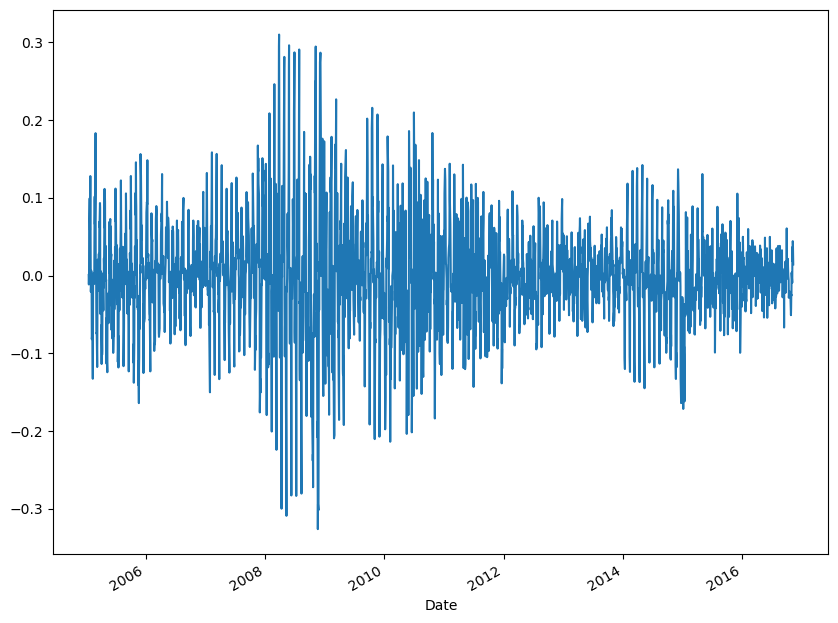

In [35]:
dTrain['Seasonal 1 Difference'].plot()
plt.show()

In [36]:
ad_test(dTrain['First Difference'].dropna())

1. ADF :  -20.30620417897668
2. P-Value :  0.0
Los datos son estacionarios
3. Num Of Lags :  22
4. Num Of Observations Used For ADF Regression: 3067
5. Critical Values :
	 1% :  -3.432483935945627
	 5% :  -2.86248283819979
	 10% :  -2.5672718962760706


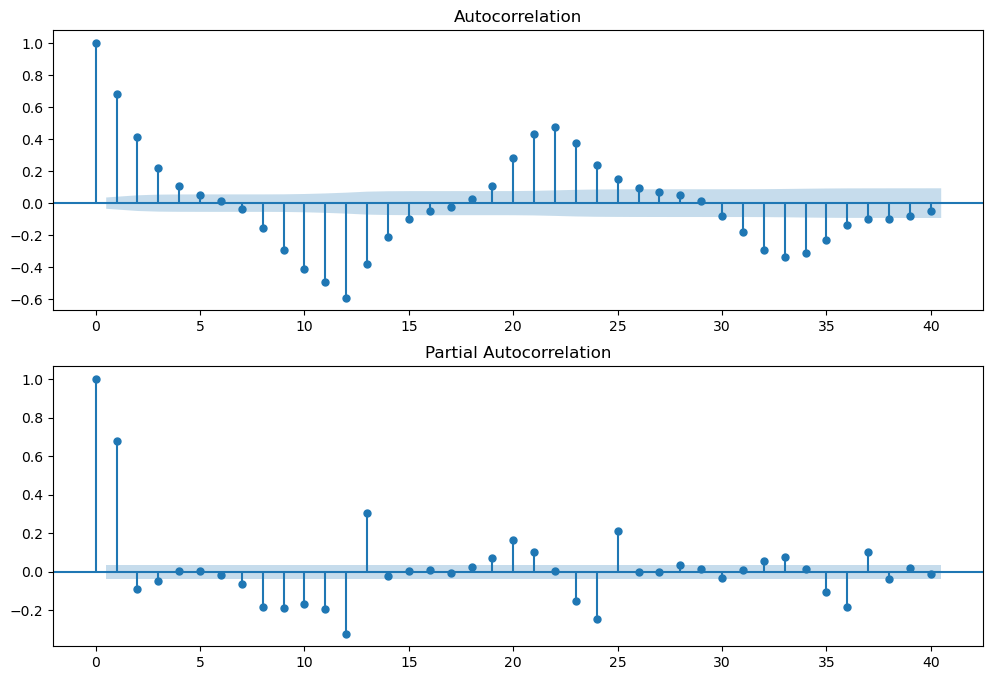

In [37]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dTrain['Seasonal 1 Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dTrain['Seasonal 1 Difference'].dropna(),lags=40,ax=ax2)
plt.show()

In [38]:
stepwise_fit = auto_arima(data['Máximo'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-17778.702, Time=9.49 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-17266.643, Time=1.18 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-17305.768, Time=0.70 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-17318.583, Time=0.62 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-17268.638, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-17918.765, Time=11.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-17886.697, Time=8.96 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-17353.829, Time=1.68 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-17926.438, Time=11.54 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-17448.657, Time=2.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-17880.207, Time=8.07 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-17878.203, Time=8.26 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-17533.035, Time=2.86 sec
 ARIMA(4,1

In [41]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(data['Máximo'], order=(4,1,1))
model_fit = model.fit()
model_fit.summary()

/home/camilocorredor/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/home/camilocorredor/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, bu

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Máximo   No. Observations:                 4416
Model:                 ARIMA(4, 1, 1)   Log Likelihood                8979.733
Method:                       css-mle   S.D. of innovations              0.032
Date:                Thu, 03 Mar 2022   AIC                         -17945.467
Time:                        20:52:16   BIC                         -17900.716
Sample:                             1   HQIC                        -17929.683
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.635e-05   6.69e-05     -0.394      0.693      -0.000       0.000
ar.L1.D.Máximo     0.6939      0.016     43.592      0.000       0.663       0.725
ar.L2.D.Máximo    -0.0379      0.018     -2.070      0.038      -0.074      -0.002
ar.L3.D.Máximo    -0.0636      0.018     -3.474      0.001      -0.099      -0.028
ar.L4.D.Máximo    -0.0275      0.016     -1.771      0.077      -0.058       0.003
ma.L1.D.Máximo    -0.9392      0.005   -176.442      0.000      -0.950      -0.929
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4365           -0.7802j            1.6347           -0.0792
AR.2            1.4365           +0.7802j            1.6347            0.0792
AR.3           -2.5922           -2.6230j            3.6878           -0.3741
AR.4           -2.5922           +2.6230j            3.6878            0.3741
MA.1            1.0648           +0.0000j            1.0648            0.0000
-----------------------------------------------------------------------------
"""

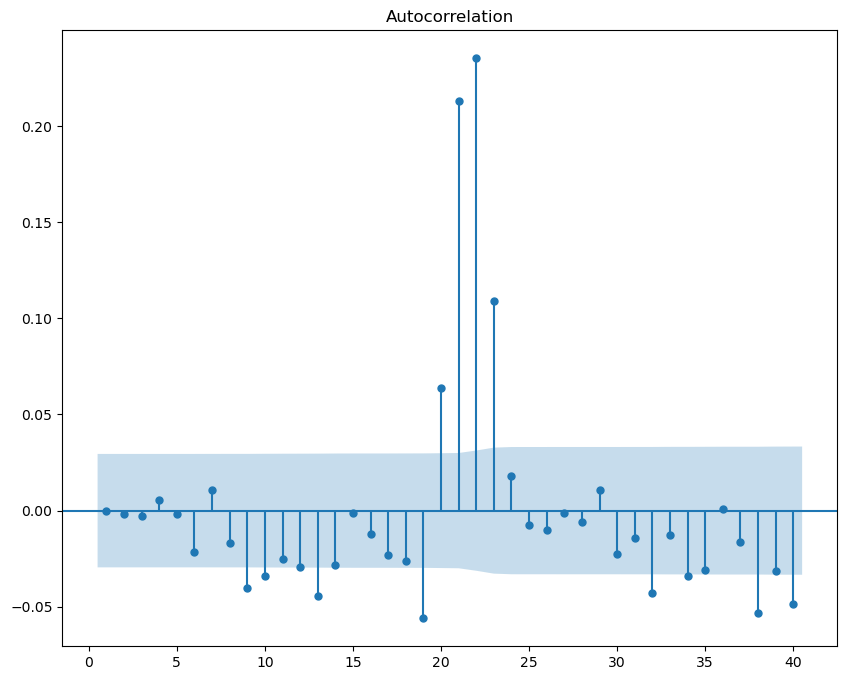

In [42]:
data['Resid_model_0_1_1'] = model_fit.resid
sgt.plot_acf(data.Resid_model_0_1_1[1:], zero=False, lags=40)
plt.show()


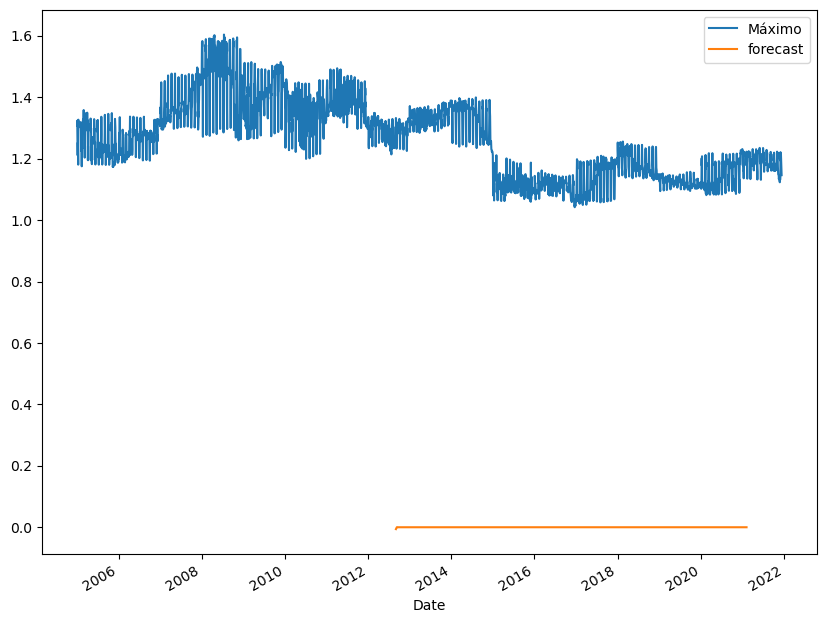

In [44]:
data['forecast'] = model_fit.predict(start = 2000, end = 4200, dynamic=True)
data[['Máximo', 'forecast']].plot()
plt.show()

/home/camilocorredor/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/camilocorredor/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/camilocorredor/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


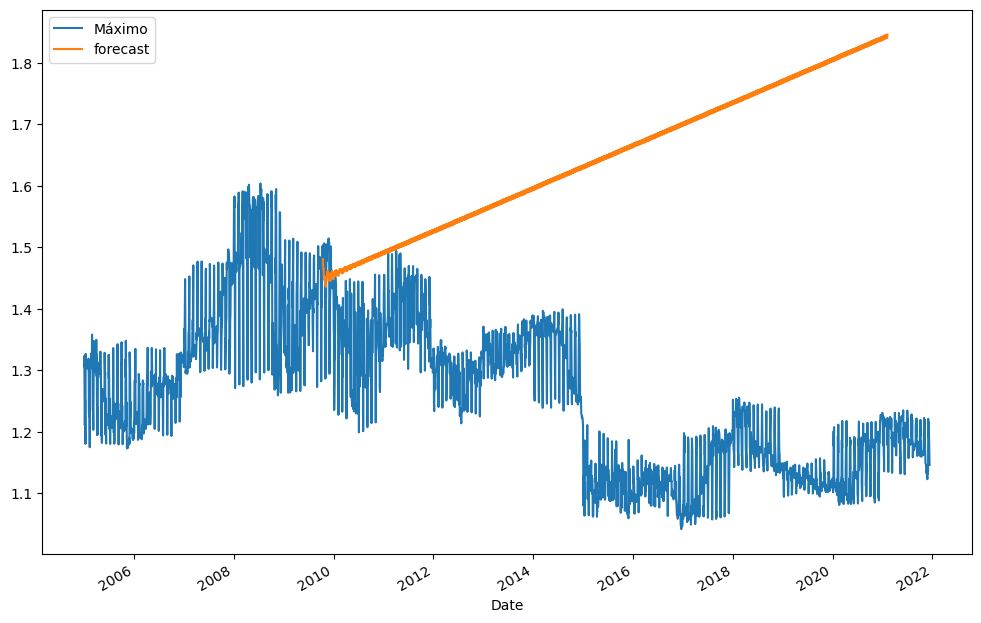

In [46]:
model=sm.tsa.statespace.SARIMAX(data['Máximo'],order=(1, 1, 1),seasonal_order=(4,1,4,6))
results=model.fit()
data['forecast']=results.predict(start=1250,end=4200,dynamic=True)
data[['Máximo','forecast']].plot(figsize=(12,8))
plt.show()

In [22]:
# F1 = list(data['Date'].value_counts().index)
F2 = list(data['Cierre'].value_counts().index)
F3 = list(data['Apertura'].value_counts().index)
F4 = list(data['Máximo'].value_counts().index)
F5 = list(data['Mínimo'].value_counts().index)
F6 = list(data['var%'].value_counts().index)
F7 = list(data['Bitcoin'].value_counts().index)
F8 = list(data['CAC40'].value_counts().index)
F9 = list(data['DAX'].value_counts().index)
F10 = list(data['DowJones'].value_counts().index)
F11 = list(data['EuroStoxx50'].value_counts().index)
F12 = list(data['HangSeng'].value_counts().index)
F13 = list(data['Nasdaq100'].value_counts().index)
F14 = list(data['S&P500'].value_counts().index)
F15 = list(data['Shangai'].value_counts().index)
F16 = list(data['FTSE_GB'].value_counts().index)
F17 = list(data['WTI_USD'].value_counts().index)
C = list(data['Tendencia'].value_counts().index)

In [9]:
Indicador = MissingIndicator(missing_values = np.nan) 
Indicador.fit(data) 
Datos_Indicador = Indicador.transform(data) 
#display(Datos_Indicador) 
print(f'Características donde hay datos faltantes: "{Indicador.features_}')
POS = np.where(Datos_Indicador == True) # Se busca aquellos datos que tiene un valor Booleanos igual a True
print(f'Porcentaje de Datos Faltantes: " {round(100*(len(POS[0])/(Datos_Indicador.shape[0]*Datos_Indicador.shape[1])),3)}%')

Características donde hay datos faltantes: "[ 5  6  7  8  9 10 11 12 13 14 15 16]
Porcentaje de Datos Faltantes: " 9.888%


<AxesSubplot:title={'center':'Distribución de la variable de salida'}>

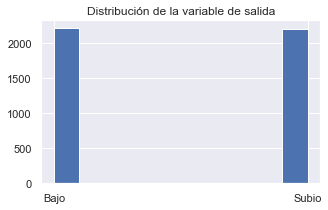

In [10]:
categorias = data['Tendencia'].groupby(data['Tendencia']).count()
categorias
plt.figure(figsize=(5,3))
plt.title('Distribución de la variable de salida')
data['Tendencia'].hist()


In [72]:
nombres = ['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']
data_KN5 = data[['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']]
imp = KNNImputer(missing_values = np.nan, n_neighbors = 5, weights = 'uniform') 
imp.fit(data_KN5)
data_KN5 = imp.transform(data_KN5)
#print(DatosF_Imp_Vf)
data_KN5 = pd.DataFrame(data_KN5, columns = nombres)
data_KN5

,Cierre,Apertura,Máximo,Mínimo,var%,Bitcoin,CAC40,DAX,DowJones,EuroStoxx50,HangSeng,IBEX35,Nasdaq100,S&P500,Shangai,FTSE_GB,WTI_USD
0,1.3463,1.3547,1.3582,1.3386,-0.70,12789.20,3855.68,4291.53,10729.430,2217.802,14237.420,9124.10,1603.510,1945.66,2515.790,4964.10,42.22
1,1.3272,1.3466,1.3496,1.3249,-1.42,8239.66,3863.30,4290.50,10630.780,2177.958,14045.900,9120.00,1571.830,1954.12,1242.770,4847.00,42.28
2,1.3262,1.3282,1.3305,1.3215,-0.08,8789.78,3829.36,4258.24,10597.830,2217.802,13764.360,9024.40,1563.760,1954.12,1251.940,4806.00,43.34
3,1.3171,1.3262,1.3286,1.3156,-0.69,6862.68,3856.48,4300.94,10622.880,2217.802,13712.040,9068.88,1557.520,2051.64,1239.430,4824.30,43.17
4,1.3054,1.3171,1.3251,1.3024,-0.89,6862.68,3877.96,4316.40,10603.960,2217.802,13574.860,9041.10,1564.810,1954.12,1244.750,4854.10,45.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4412,1.1319,1.1339,1.1360,1.1302,-0.15,57210.30,6881.87,15472.67,34021.610,4179.150,23658.920,8452.60,15877.720,7530.00,3576.890,7168.68,66.77
4413,1.1299,1.1320,1.1349,1.1294,-0.18,56496.00,6795.75,15263.11,34641.700,4108.020,23788.930,8300.80,15990.760,7762.50,3573.840,7129.21,67.84
4414,1.1313,1.1301,1.1334,1.1265,0.12,53631.50,6765.52,15169.98,34579.550,4080.150,23766.690,8241.70,15712.040,7704.30,3607.430,7122.32,66.74
4415,1.1305,1.1321,1.1321,1.1301,-0.08,49405.50,4502.05,5552.55,10735.412,4099.972,16534.392,10627.28,1601.718,2649.92,1220.028,5564.24,67.95


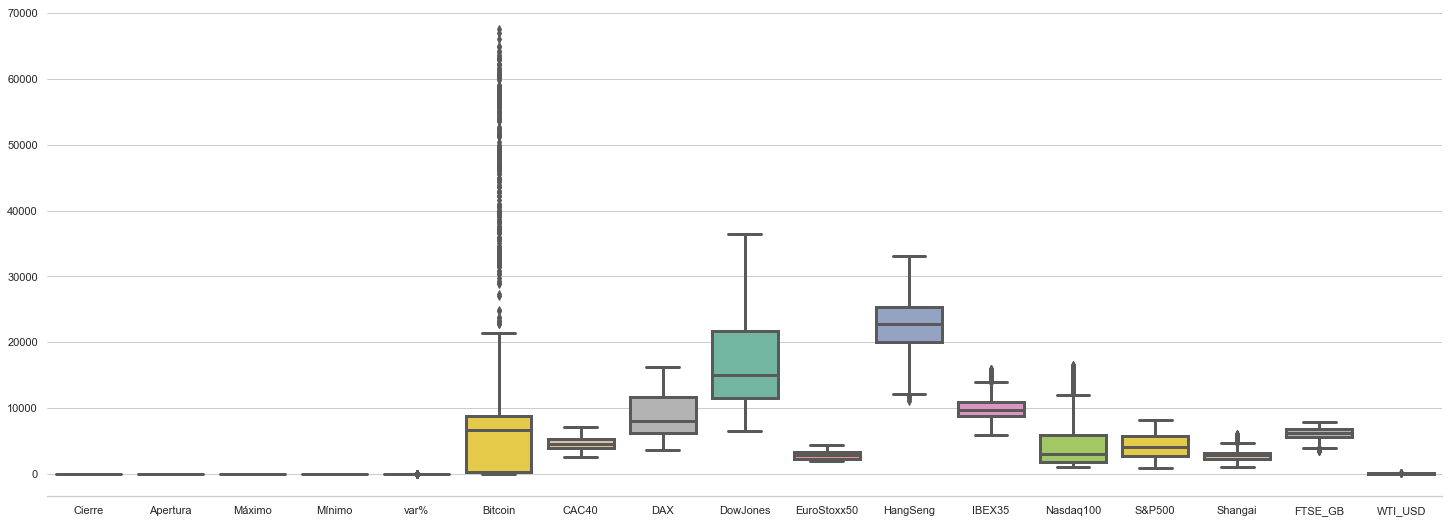

In [12]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_KN5, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot
sns.despine(left=True)

In [15]:
Caracteristicas = ['Cierre','Apertura','Máximo','Mínimo','var%','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']
scaler = StandardScaler()
data_fit = scaler.fit_transform(data_KN5)
data_fit = pd.DataFrame(data = data_KN5, columns = Caracteristicas)

<AxesSubplot:>

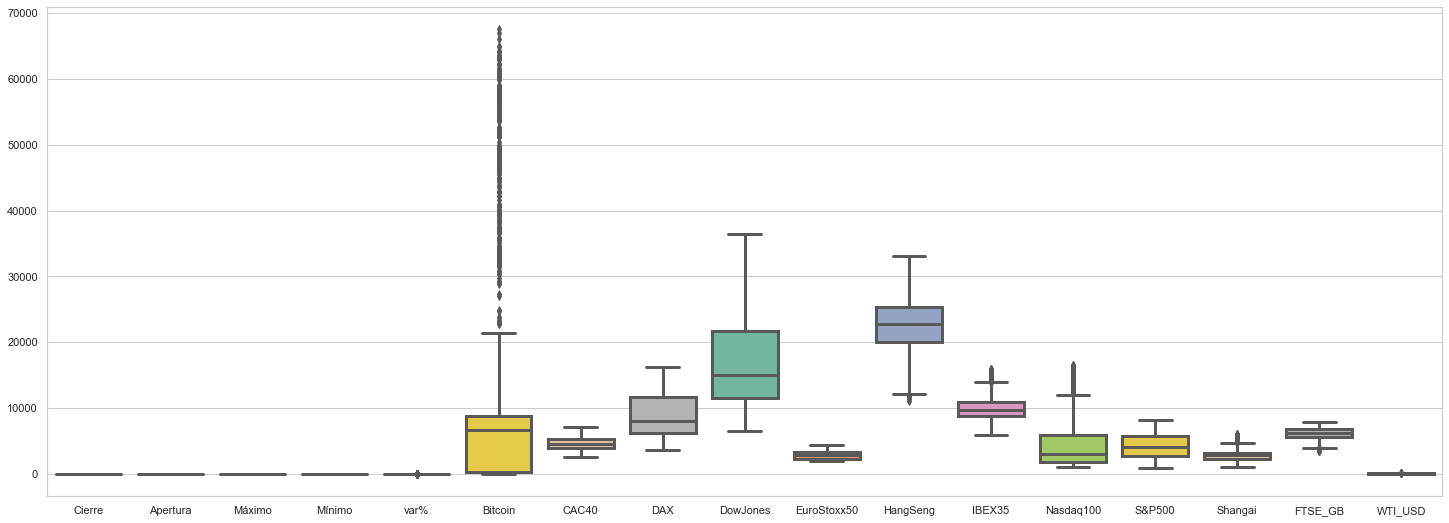

In [16]:
sns.set(rc={'figure.figsize':(25,9)}) # Tamaño de la figura
sns.set(style="whitegrid") # Estilo de la figura
sns.boxplot(data = data_fit, linewidth = 3, palette="Set2", fliersize = 5) # Diagrama Box Plot

/home/camilocorredor/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:132: UserWarning: The handle <matplotlib.patches.Patch object at 0x7f6a5e0b0490> has a label of '_nolegend_' which cannot be automatically added to the legend.
  figlegend = self.fig.legend(handles, labels, **kwargs)


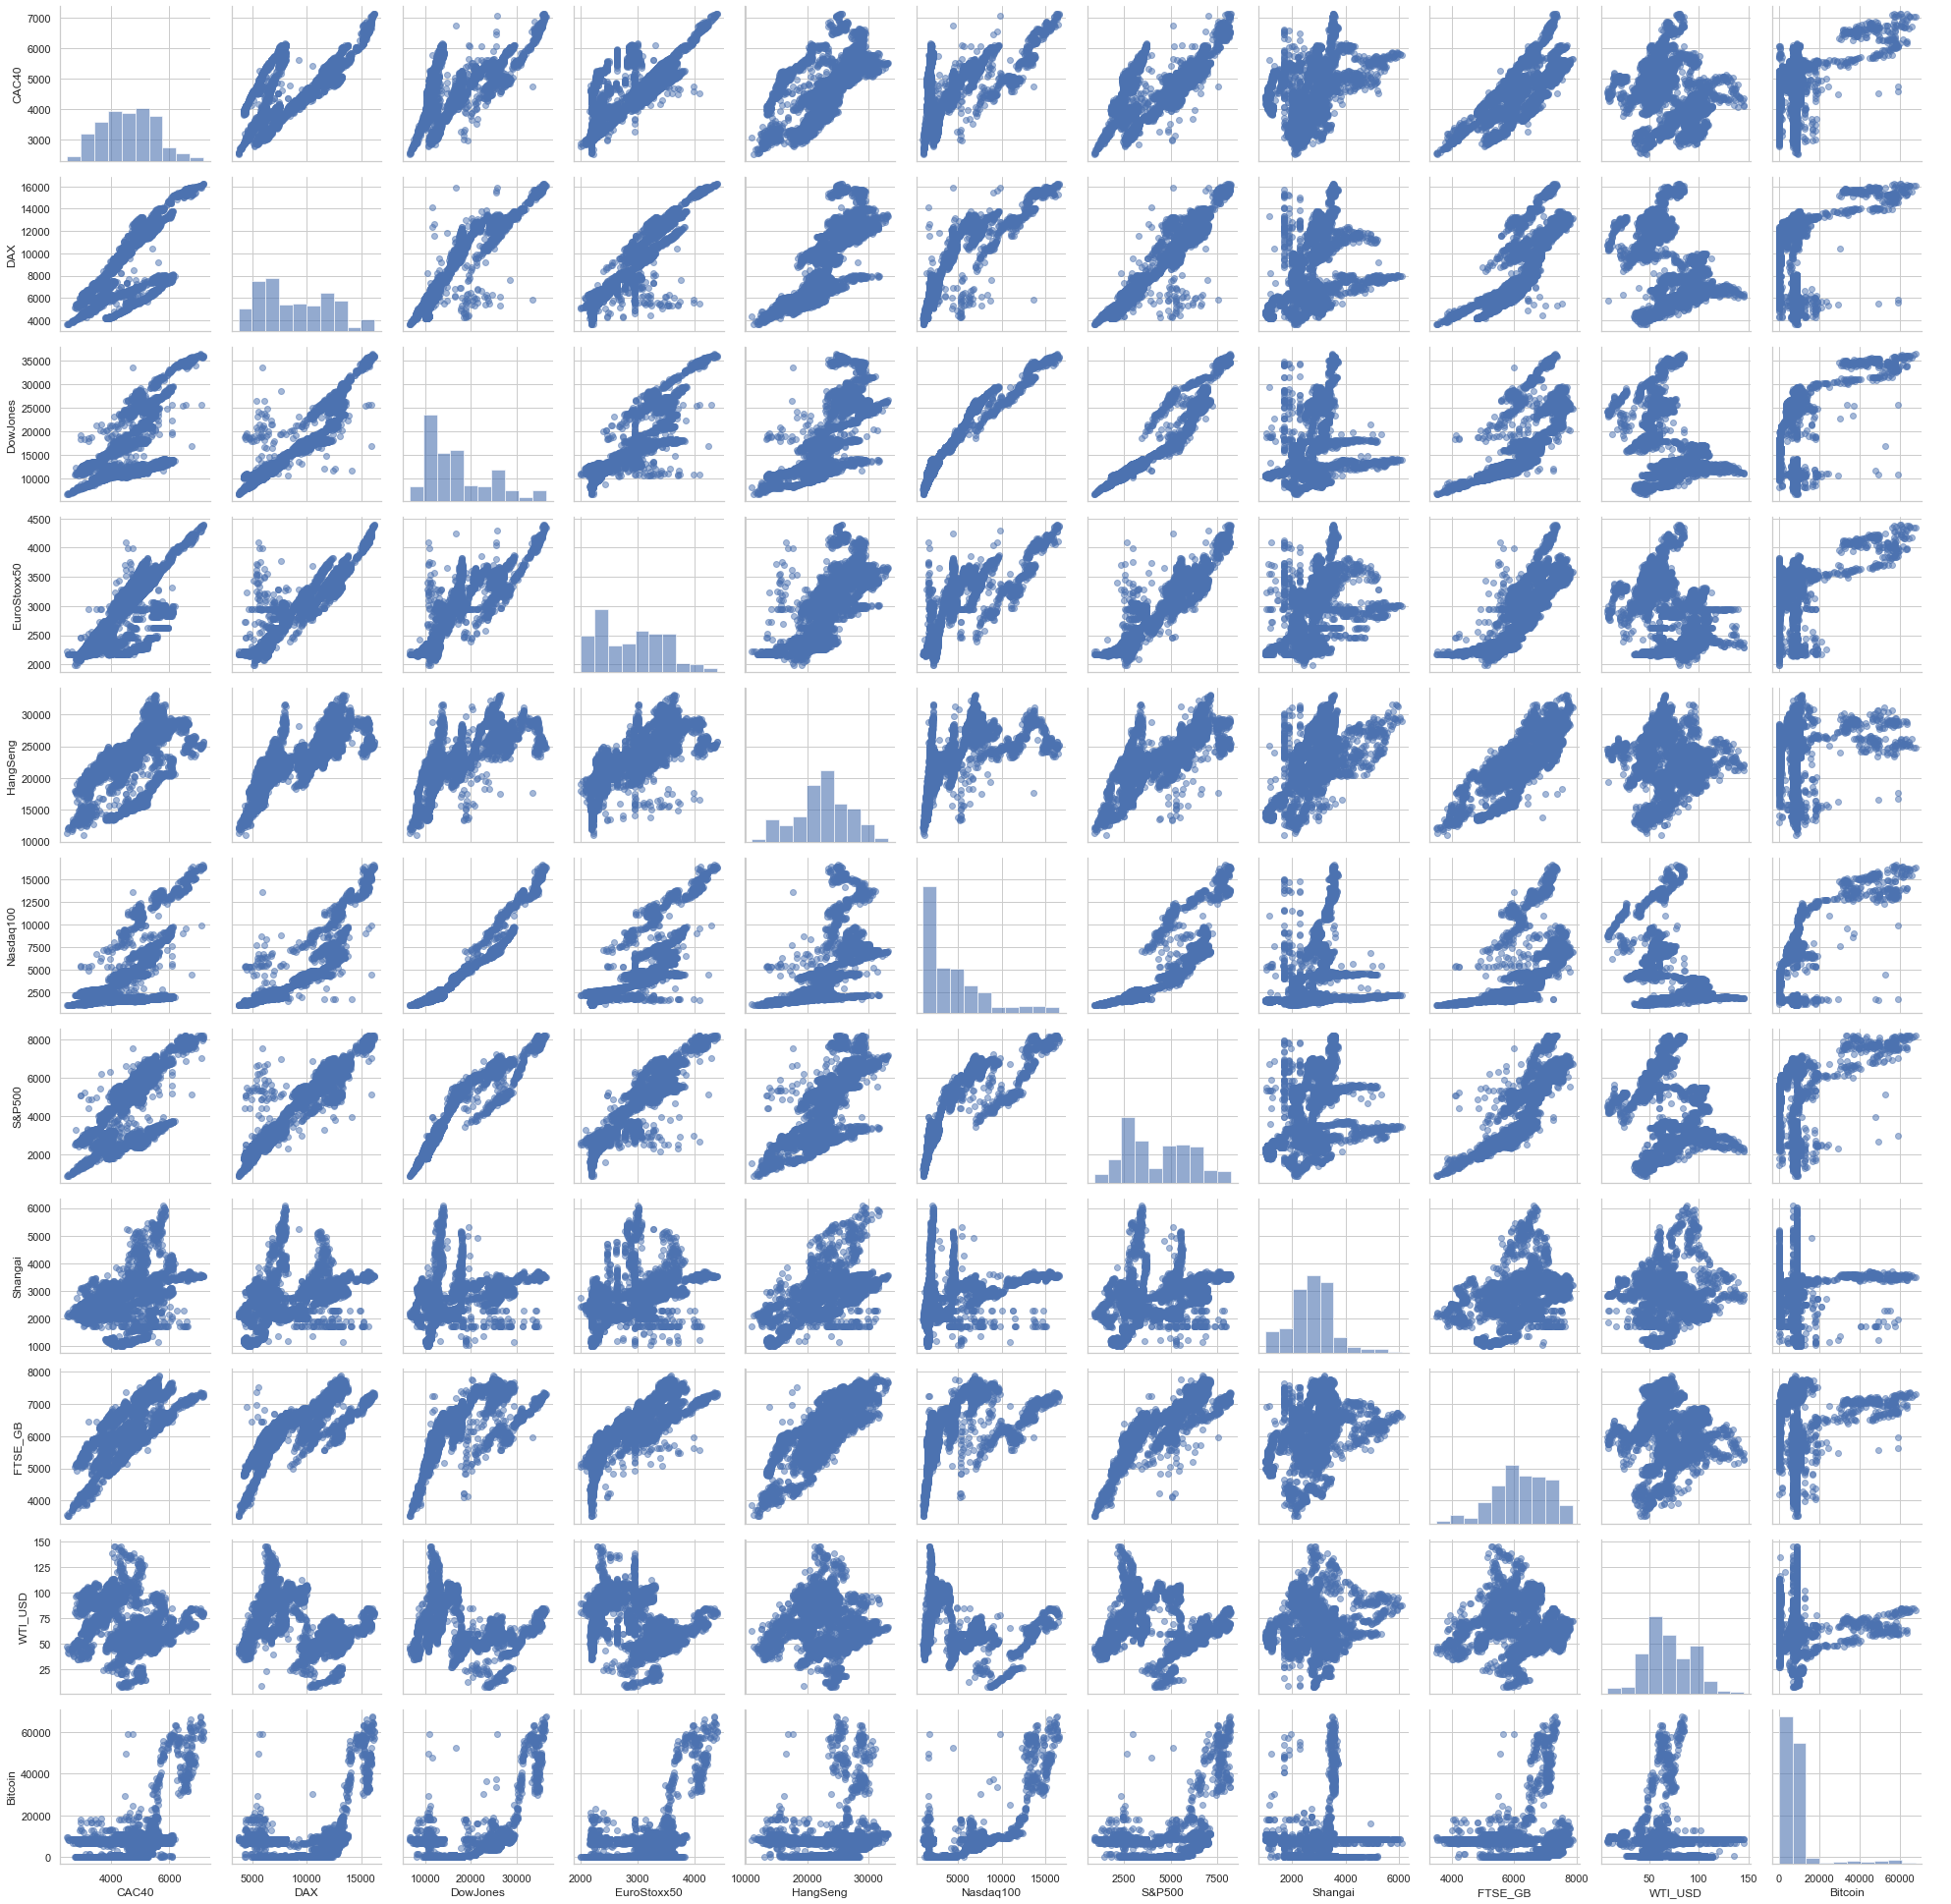

In [17]:
graph = sns.PairGrid(data_fit, vars= ['CAC40','DAX','DowJones','EuroStoxx50','HangSeng','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD','Bitcoin'])
#DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD'])  
graph.map_diag(plt.hist, alpha = 0.6)
graph.map_offdiag(plt.scatter, alpha = 0.5)
graph.add_legend() 

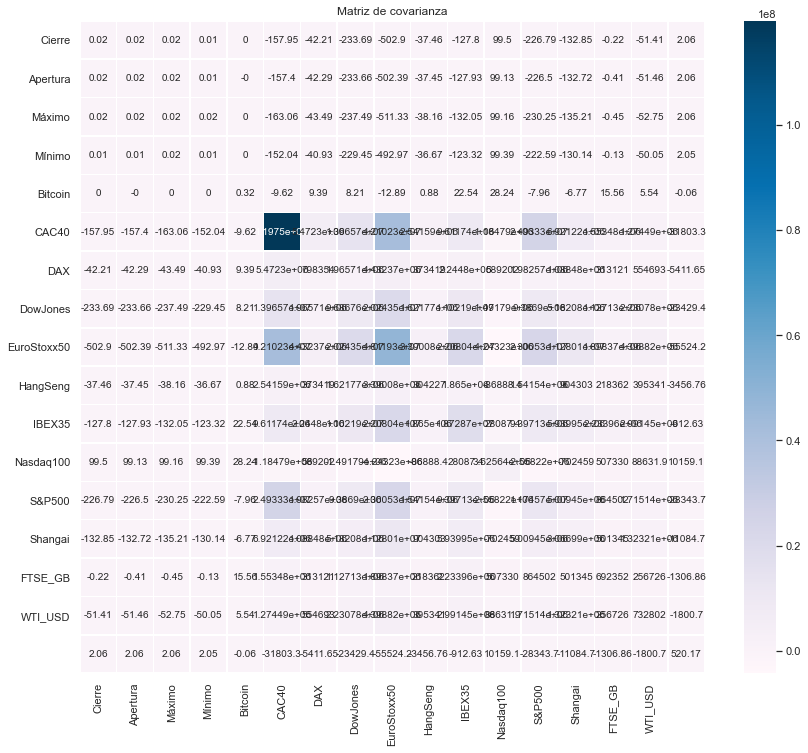

In [18]:
MCova = np.round(np.cov(data_fit.transpose(), bias=True),2) 
Caracteristicas = ['Cierre','Apertura','Máximo','Mínimo','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']

plt.figure(figsize=(14,12))
plt.title('Matriz de covarianza')
ax = sns.heatmap(MCova, annot=True, annot_kws={'size':10}, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas,cmap="PuBu", linewidths=.5)
plt.show()

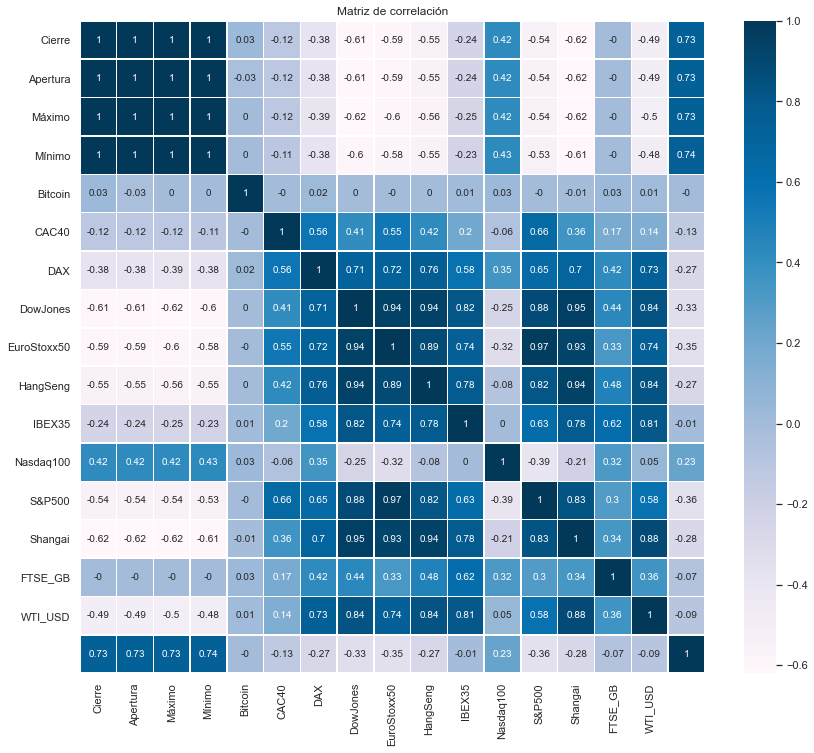

In [20]:
Mcor = round(data_fit.corr(),2)
plt.figure(figsize=(14,12))
plt.title('Matriz de correlación')
ax = sns.heatmap(Mcor,annot=True, annot_kws={'size':10}, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas, cmap="PuBu",linewidths=.5)
plt.show()

In [21]:
r = []
valor_p = []
Datos_SS = data_fit.values
Datos_SS = np.asarray(data_fit)

for _,n in enumerate(np.arange(0,Datos_SS.shape[1])):
   for _,m in enumerate(np.arange(0,Datos_SS.shape[1])):  
       r_valor, p_valor = pearsonr(Datos_SS[:,n], Datos_SS[:,m])
       r.append(round(r_valor,3))
       valor_p.append(round(p_valor,3))

r = np.asarray(r)
valor_p = np.asarray(valor_p)

pearson_r = r.reshape(data_IVf_SS.shape[1],data_IVf_SS.shape[1])
p_value = valor_p.reshape(data_IVf_SS.shape[1],data_IVf_SS.shape[1])

plt.figure(figsize=(10,10))
plt.title('Matriz coeficiente de correlación de Spearman')
ax = sns.heatmap(pearson_r, annot=True, annot_kws={'size':7}, fmt='g', xticklabels = Caracteristicas, yticklabels = Caracteristicas, cmap="PuBu")
plt.show()

NameError: name 'data_IVf_SS' is not defined

In [23]:
le = preprocessing.LabelEncoder()

X = data_KN5[['Cierre','Apertura','Máximo','Mínimo','Bitcoin','CAC40','DAX','DowJones','EuroStoxx50','HangSeng','IBEX35','Nasdaq100','S&P500','Shangai','FTSE_GB','WTI_USD']]
Y = data[['Tendencia']]

le.fit(Y['Tendencia'].unique())
Y = le.transform(Y['Tendencia'].values)
Y

array([0, 0, 0, ..., 1, 0, 0])

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [25]:
#estimators =[100,140,180,240,300,400,500]
estimators =[500,600,700]
#depth = [12,14,18,20,25,30]
depth = [14,18,20]

rf = RandomForestClassifier(random_state=0)

parameters = {'n_estimators':estimators, 'max_depth':depth}

clf3 = GridSearchCV(estimator=rf, param_grid = parameters, scoring='balanced_accuracy',return_train_score=True)
clf3.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [14, 18, 20],
                         'n_estimators': [500, 600, 700]},
             return_train_score=True, scoring='balanced_accuracy')

In [26]:
clf3.best_params_

{'max_depth': 18, 'n_estimators': 600}

Balanced Accuracy = 0.7170334613387619


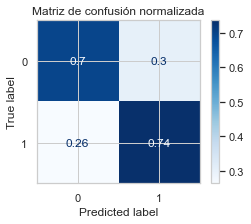

In [30]:
print('Balanced Accuracy = '+str(balanced_accuracy_score(y_test,clf3.predict(X_test))))

fig, ax1 = plt.subplots(1, 1, figsize=(4,3))
plt.title("Matriz de confusión normalizada")

disp = plot_confusion_matrix(clf3, X_test, y_test,

cmap=plt.cm.Blues,
normalize='true',ax=ax1)
#print(title)
#print(disp.confusion_matrix)

plt.show() 